In [213]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## week 3 imports
import missingno as msno     # msno.bar(titanic);  or msno.matrix(titanic);
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Linear and general modeling imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Feature Engineering
from sklearn.impute import SimpleImputer   # Imputation 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures   # Scale/transform/feature engineering

import patsy
# y, X = patsy.dmatrices(formula, data=diamonds, return_type='dataframe')

# GridSearch and Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# Logistic and Classification metrics
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler

# naive bayes imports
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# SVMs
from sklearn.svm import LinearSVC, SVC

# Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Import Bagging, Boosting, and Random Forests, and ExtraTrees (Extremely Randomized Trees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

import json

In [263]:
df = pd.read_csv('./data/Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


### EDA and Cleaning

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [265]:
df.shape

(14640, 15)

In [266]:
# Checks the unique airlines in this dataset
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [267]:
# Looks at unique values in airline_sentiment_gold column
df['airline_sentiment_gold'].value_counts(dropna=False)

NaN         14600
negative       32
positive        5
neutral         3
Name: airline_sentiment_gold, dtype: int64

In [268]:
# Looks at unique values and counts of negativereason_gold
df['negativereason_gold'].value_counts(dropna=False)

NaN                                         14608
Customer Service Issue                         12
Late Flight                                     4
Can't Tell                                      3
Cancelled Flight                                3
Cancelled Flight\nCustomer Service Issue        2
Bad Flight                                      1
Late Flight\nFlight Attendant Complaints        1
Lost Luggage\nDamaged Luggage                   1
Late Flight\nCancelled Flight                   1
Late Flight\nLost Luggage                       1
Flight Attendant Complaints                     1
Customer Service Issue\nCan't Tell              1
Customer Service Issue\nLost Luggage            1
Name: negativereason_gold, dtype: int64

In [269]:
# Looks at the balance of the response variable classes
df['airline_sentiment'].value_counts(dropna=False, normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [270]:
# Looks at airline_sentiment when negativereason is not null
df[df['negativereason'].notnull()]['airline_sentiment'].value_counts(dropna=False)

negative    9178
Name: airline_sentiment, dtype: int64

Note: Columns to drop:
* airline_sentiment_confidence: Not relevant column for my analysis at this point
* negativereason: Too many nulls, and not appropriate for analysis
* negativereason_confidence: Not relevant colum for analysis at this point
* name: not relevant for analysis
* airline_sentiment_gold: too many nulls
* negativereason_gold: too many nulls
* tweet_coord: too many nulls
* tweet_location: too many nulls
* user_timezone: too many nulls


In [271]:
# Creates list of columns to drop due to irrelevance and too many nulls
drop_cols = ['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 
             'name', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord',
             'tweet_location', 'user_timezone']
len(drop_cols)

10

In [272]:
# Drop unwanted columns
df.drop(columns=drop_cols, inplace=True)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   airline            14640 non-null  object
 2   retweet_count      14640 non-null  int64 
 3   text               14640 non-null  object
 4   tweet_created      14640 non-null  object
dtypes: int64(1), object(4)
memory usage: 572.0+ KB


In [274]:
# Looks at the negative, neutral, positive spread among the different airlines
crosstab = pd.crosstab(index=df['airline'], columns=df['airline_sentiment'], margins=True)
crosstab

airline_sentiment,negative,neutral,positive,All
airline,,,,
American,1960,463,336,2759
Delta,955,723,544,2222
Southwest,1186,664,570,2420
US Airways,2263,381,269,2913
United,2633,697,492,3822
Virgin America,181,171,152,504
All,9178,3099,2363,14640


In [323]:
# normalizes the cross tab table across the rows
crosstab.div(crosstab["All"],axis=0)

airline_sentiment,negative,neutral,positive,All
airline,,,,
American,0.710402,0.167814,0.121783,1.0
Delta,0.429793,0.325383,0.244824,1.0
Southwest,0.490083,0.274380,0.235537,1.0
US Airways,0.776862,0.130793,0.092345,1.0
United,0.688906,0.182365,0.128728,1.0
Virgin America,0.359127,0.339286,0.301587,1.0
All,0.626913,0.211680,0.161407,1.0


In [276]:
# Changes tweet_created to a datetime object
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [277]:
# pulls out the day, month, and hour from tweet_created column and creates 3 new columns
df['tweet_day'] = df['tweet_created'].dt.dayofweek
df['tweet_month'] = df['tweet_created'].dt.month
df['tweet_hour'] = df['tweet_created'].dt.hour
df.head()

,airline_sentiment,airline,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,1,2,11
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,1,2,11
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,1,2,11
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,1,2,11
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,1,2,11


In [278]:
# Creates dataframes containing all positive reviews, all neutral reviews, and all negative reviews
pos_df = df[df['airline_sentiment'] == 'positive']
neg_df = df[df['airline_sentiment'] == 'negative']
neu_df = df[df['airline_sentiment'] == 'neutral']

### EDA of tweet_hour spread between positive, neutral, and negative reviews

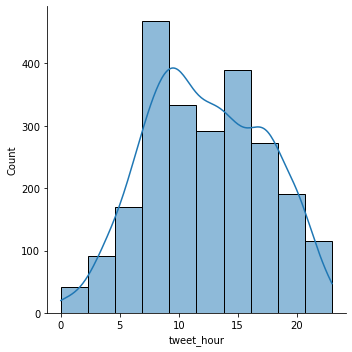

In [279]:
# Spread of positive reviews by tweet_hour
sns.displot(x=pos_df['tweet_hour'], bins = 10, kde = True);

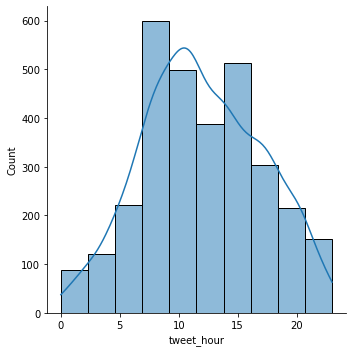

In [280]:
# Spread of neutral reviews by tweet_hour
sns.displot(x=neu_df['tweet_hour'], bins = 10, kde = True);

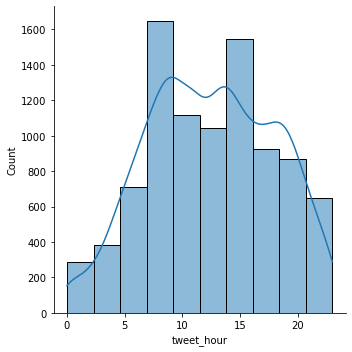

In [281]:
# Spread of negative reviews by tweet_hour
sns.displot(x=neg_df['tweet_hour'], bins = 10, kde = True);

### EDA of tweet_day spread between positive, neutral, and negative reviews

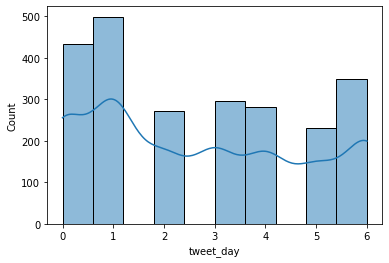

In [282]:
# Spread of positive reviews by tweet_day
sns.histplot(x=pos_df['tweet_day'], bins = 10, kde = True);

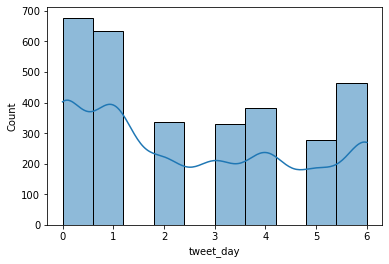

In [283]:
# Spread of neutral reviews by tweet_day
sns.histplot(x=neu_df['tweet_day'], bins = 10, kde = True);

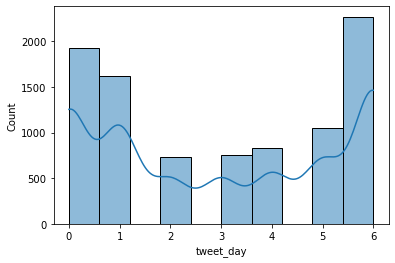

In [284]:
# Spread of negative reviews by tweet_day
sns.histplot(x=neg_df['tweet_day'], bins = 10, kde = True);

### EDA of retweet_count spread between positive, neutral, and negative reviews

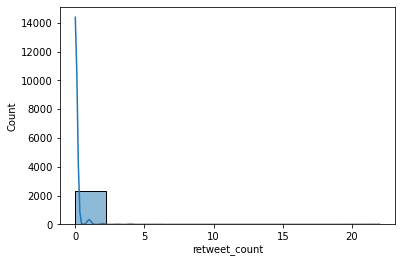

In [285]:
# Spread of positive reviews by retweet_count
sns.histplot(x=pos_df['retweet_count'], bins = 10, kde = True);

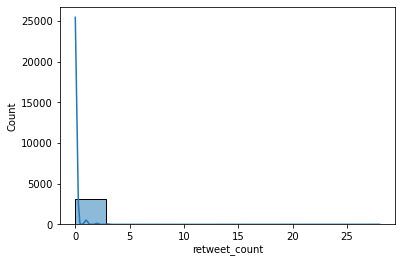

In [286]:
# Spread of neutral reviews by retweet_count
sns.histplot(x=neu_df['retweet_count'], bins = 10, kde = True);

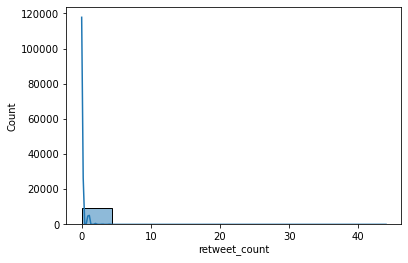

In [287]:
# Spread of negative reviews by retweet_count
sns.histplot(x=neg_df['retweet_count'], bins = 10, kde = True);

In [288]:
# dir(df['tweet_created'].dt)

C:\Users\snchu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


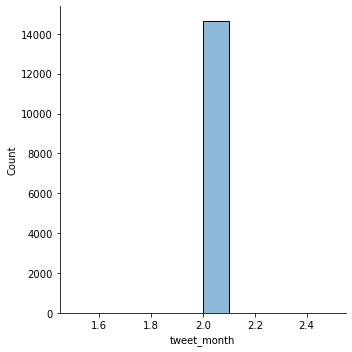

In [289]:
# Looks at the spread of tweet_month of the dataframe
sns.displot(x=df['tweet_month'], bins = 10, kde=True)

In [290]:
df.head()

,airline_sentiment,airline,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,1,2,11
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,1,2,11
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,1,2,11
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,1,2,11
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,1,2,11


In [291]:
df = pd.get_dummies(df, columns=['airline'], drop_first=True)
df.head()

,airline_sentiment,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,neutral,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,1,2,11,0,0,0,0,1
1,positive,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,1,2,11,0,0,0,0,1
2,neutral,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,1,2,11,0,0,0,0,1
3,negative,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,1,2,11,0,0,0,0,1
4,negative,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,1,2,11,0,0,0,0,1


### Text Processing

In [292]:
df.head()

,airline_sentiment,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,neutral,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,1,2,11,0,0,0,0,1
1,positive,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,1,2,11,0,0,0,0,1
2,neutral,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,1,2,11,0,0,0,0,1
3,negative,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,1,2,11,0,0,0,0,1
4,negative,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,1,2,11,0,0,0,0,1


In [293]:
# Removes the @airlinename from the text column
df['text'] = df['text'].str.replace('@+\w*', '')
df.head()

,airline_sentiment,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,neutral,0,What said.,2015-02-24 11:35:52-08:00,1,2,11,0,0,0,0,1
1,positive,0,plus you've added commercials to the experien...,2015-02-24 11:15:59-08:00,1,2,11,0,0,0,0,1
2,neutral,0,I didn't today... Must mean I need to take an...,2015-02-24 11:15:48-08:00,1,2,11,0,0,0,0,1
3,negative,0,"it's really aggressive to blast obnoxious ""en...",2015-02-24 11:15:36-08:00,1,2,11,0,0,0,0,1
4,negative,0,and it's a really big bad thing about it,2015-02-24 11:14:45-08:00,1,2,11,0,0,0,0,1


In [294]:
def clean_text_stem(text):
    """Cleans text by keeping words only, tokenizing, stemming and removing stopwords"""
    #Instantiate tokenizer and stemmer and lemmatizer
    re_tokenizer = RegexpTokenizer("\w+")
    lemmatizer = WordNetLemmatizer()
    p_stemmer = PorterStemmer()
        
    # Tokenze the text
    words = re_tokenizer.tokenize(text.lower())
    
    # Filter stop words
    stopwords_list = stopwords.words('english')
    
    # Adds custom stopwords to stopwords_list
#     custom = []
#     stopwords_list = stopwords_list + custom

    no_stops_stemmed = [p_stemmer.stem(word) for word in words if word.lower() not in stopwords_list]
    
    return (' ').join(no_stops_stemmed)

In [295]:
df['clean_text_stem'] = df['text'].map(clean_text_stem)
df.head()

,airline_sentiment,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,clean_text_stem
0,neutral,0,What said.,2015-02-24 11:35:52-08:00,1,2,11,0,0,0,0,1,said
1,positive,0,plus you've added commercials to the experien...,2015-02-24 11:15:59-08:00,1,2,11,0,0,0,0,1,plu ad commerci experi tacki
2,neutral,0,I didn't today... Must mean I need to take an...,2015-02-24 11:15:48-08:00,1,2,11,0,0,0,0,1,today must mean need take anoth trip
3,negative,0,"it's really aggressive to blast obnoxious ""en...",2015-02-24 11:15:36-08:00,1,2,11,0,0,0,0,1,realli aggress blast obnoxi entertain guest fa...
4,negative,0,and it's a really big bad thing about it,2015-02-24 11:14:45-08:00,1,2,11,0,0,0,0,1,realli big bad thing


In [296]:
# Creates a Crude basic Sentiment Analysis column
positive_words = ['amazing', 'happy', 'excited', 'great', 'incredible', 'gobsmacking', 'tasty', 'delicious', 
                  'satisfying', 'recommend', 'clean', 'yummy', 'favorite','deal', 'wonderful', 'enjoyed', 
                  'sale', 'good', 'early', 'nice']
negative_words = ['overpriced', 'nasty', 'rotten', 'rude', 'refund', 'overrated','gross', 'slow', 
                  'disappointing', 'lousy', 'manager', 'undercooked', 'bad',
                  'late', 'aggressive']

def simple_sentiment(text):
    
    """Crude sentiment analyzer.  Grabs all the words from the text, tokenizes, stems, 
    and looks for positive stems or negative stems"""
    
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+')
    
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    
    # Stem our positive/negative words.
    positive_stems = [p_stemmer.stem(i) for i in positive_words]
    negative_stems = [p_stemmer.stem(i) for i in negative_words]

    # Count "positive" words.
    positive_count = sum([1 for i in stemmed_words if i in positive_stems])
    
    # Count "negative" words
    negative_count = sum([1 for i in stemmed_words if i in negative_stems])
    
    # Calculate Sentiment Percentage 
    # (Positive Count - Negative Count) / (Total Count)

    return (positive_count - negative_count) / len(tokens)


In [297]:
# Runs the sentiment analysis on the text column
df['sentiment_score'] = df['text'].map(simple_sentiment)
df

,airline_sentiment,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,clean_text_stem,sentiment_score
0,neutral,0,What said.,2015-02-24 11:35:52-08:00,1,2,11,0,0,0,0,1,said,0.000000
1,positive,0,plus you've added commercials to the experien...,2015-02-24 11:15:59-08:00,1,2,11,0,0,0,0,1,plu ad commerci experi tacki,0.000000
2,neutral,0,I didn't today... Must mean I need to take an...,2015-02-24 11:15:48-08:00,1,2,11,0,0,0,0,1,today must mean need take anoth trip,0.000000
3,negative,0,"it's really aggressive to blast obnoxious ""en...",2015-02-24 11:15:36-08:00,1,2,11,0,0,0,0,1,realli aggress blast obnoxi entertain guest fa...,-0.058824
4,negative,0,and it's a really big bad thing about it,2015-02-24 11:14:45-08:00,1,2,11,0,0,0,0,1,realli big bad thing,-0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0,thank you we got on a different flight to Chi...,2015-02-22 12:01:01-08:00,6,2,12,0,0,0,0,0,thank got differ flight chicago,0.000000
14636,negative,0,leaving over 20 minutes Late Flight. No warni...,2015-02-22 11:59:46-08:00,6,2,11,0,0,0,0,0,leav 20 minut late flight warn commun 15 minut...,-0.086957
14637,neutral,0,Please bring American Airlines to #BlackBerry10,2015-02-22 11:59:15-08:00,6,2,11,0,0,0,0,0,pleas bring american airlin blackberry10,0.000000
14638,negative,0,"you have my money, you change my flight, and ...",2015-02-22 11:59:02-08:00,6,2,11,0,0,0,0,0,money chang flight answer phone suggest make c...,0.000000


In [300]:
df.isna().sum()

airline_sentiment         0
retweet_count             0
text                      0
tweet_created             0
tweet_day                 0
tweet_month               0
tweet_hour                0
airline_Delta             0
airline_Southwest         0
airline_US Airways        0
airline_United            0
airline_Virgin America    0
clean_text_stem           0
sentiment_score           0
dtype: int64

In [315]:
df['clean_word_count'] = df['clean_text_stem'].map(lambda x: len(x.split()))

In [318]:
df = df[df['clean_word_count'] >= 7]

In [319]:
df.shape

(10787, 15)

In [320]:
# saves final df to csv file
df.to_csv('../data/clean_tweets.csv', index=False)

### Extra EDA with Vectorized Text

In [252]:
vec_df = df.copy()

In [253]:
vec_df.head()

,tweet_id,airline_sentiment,retweet_count,text,tweet_created,tweet_day,tweet_month,tweet_hour,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,clean_text_stem,sentiment_score
0,570306133677760513,neutral,0,What said.,2015-02-24 11:35:52-08:00,1,2,11,0,0,0,0,1,said,0.000000
1,570301130888122368,positive,0,plus you've added commercials to the experien...,2015-02-24 11:15:59-08:00,1,2,11,0,0,0,0,1,plu ad commerci experi tacki,0.000000
2,570301083672813571,neutral,0,I didn't today... Must mean I need to take an...,2015-02-24 11:15:48-08:00,1,2,11,0,0,0,0,1,today must mean need take anoth trip,0.000000
3,570301031407624196,negative,0,"it's really aggressive to blast obnoxious ""en...",2015-02-24 11:15:36-08:00,1,2,11,0,0,0,0,1,realli aggress blast obnoxi entertain guest fa...,-0.058824
4,570300817074462722,negative,0,and it's a really big bad thing about it,2015-02-24 11:14:45-08:00,1,2,11,0,0,0,0,1,realli big bad thing,-0.100000


In [251]:
# # Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer()

In [254]:
# Creates separate dataframes for pos, neutral, and neg
vec_pos_df = vec_df[vec_df['airline_sentiment'] == 'positive']
vec_neu_df = vec_df[vec_df['airline_sentiment'] == 'neutral']
vec_neg_df = vec_df[vec_df['airline_sentiment'] == 'negative']

In [256]:
# Fits and transfoarms the vectorizer on our corpus
vec_pos = cvec.fit_transform(vec_pos_df['clean_text_stem'])
vec_neu = cvec.fit_transform(vec_neu_df['clean_text_stem'])
vec_neg = cvec.fit_transform(vec_neg_df['clean_text_stem'])

In [259]:
# vec_pos_display = pd.DataFrame(vec_pos.toarray(), columns=cvec.get_feature_names())
# vec_neu_display = pd.DataFrame(vec_neu.toarray(), columns=cvec.get_feature_names()) 
# vec_neg_display = pd.DataFrame(vec_neg.toarray(), columns=cvec.get_feature_names()) 


# # plot top occurring words
# X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh')aa

Limitations:
- A majority of the reviews are negative which makes sense since people only give reviews if they've had a bad experience 
- The sentiment response variable accuracy could be called into question since there was an airline_sentiment_confidence column, as if people were not as confident in some sentiment conclusions as they were in others. 
- By the end of the cleaning, only had 10,000 text observations to work with
